In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

In [15]:
df = pd.read_csv("household_power_consumption.csv", na_values='?')


In [16]:
df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%d/%m/%Y %H:%M:%S")
df.set_index('timestamp', inplace=True)
df.sort_index(inplace=True)

In [17]:
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
        'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[cols] = df[cols].astype(float)

In [18]:
df_hourly = df[cols].resample('h').mean()
df_hourly = df_hourly.ffill().bfill()

In [19]:
df_hourly['hour'] = df_hourly.index.hour
df_hourly['dayofweek'] = df_hourly.index.dayofweek
df_hourly['month'] = df_hourly.index.month
df_hourly['lag_1'] = df_hourly['Global_active_power'].shift(1)
df_hourly['rolling_mean_3'] = df_hourly['Global_active_power'].rolling(3).mean()
df_hourly.dropna(inplace=True)

In [20]:
train = df_hourly[:int(0.8*len(df_hourly))]
test = df_hourly[int(0.8*len(df_hourly)):]

In [21]:
X_train = train.drop('Global_active_power', axis=1)
y_train = train['Global_active_power']
X_test = test.drop('Global_active_power', axis=1)
y_test = test['Global_active_power']

In [22]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [23]:
print("✅ RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("✅ MAE:", mean_absolute_error(y_test, predictions))

✅ RMSE: 0.03387372305036753
✅ MAE: 0.013318178301891352


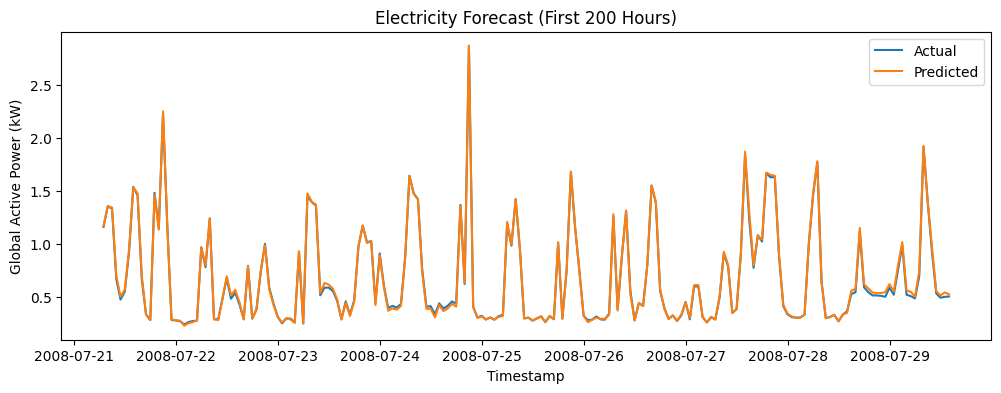

In [24]:
plt.figure(figsize=(12, 4))
plt.plot(y_test.index[:200], y_test.values[:200], label='Actual')
plt.plot(y_test.index[:200], predictions[:200], label='Predicted')
plt.title("Electricity Forecast (First 200 Hours)")
plt.xlabel("Timestamp")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.show()

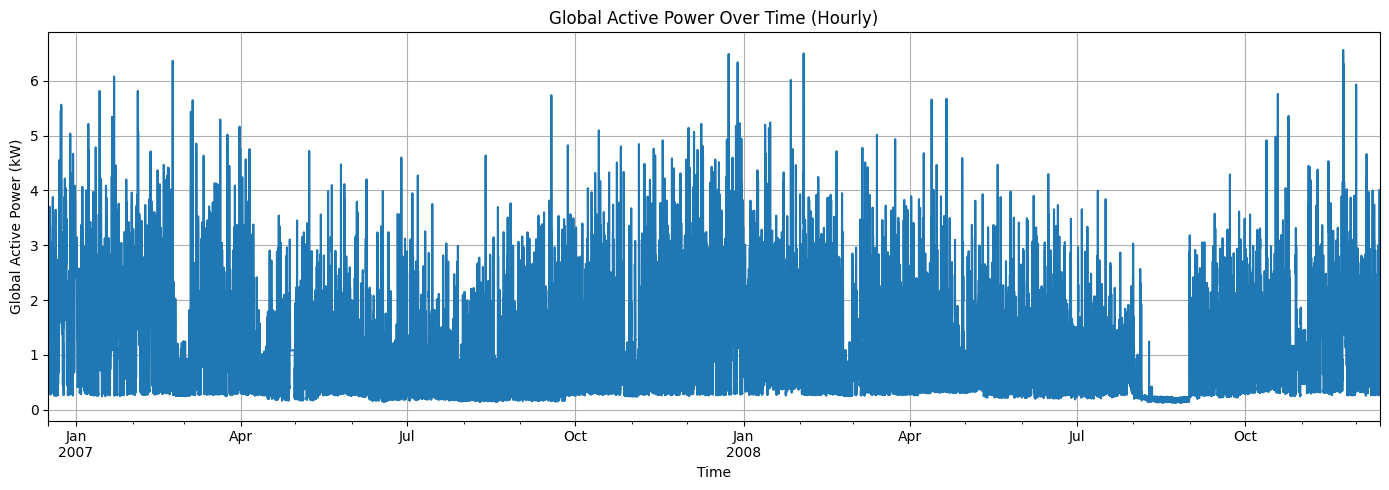

In [26]:
plt.figure(figsize=(14, 5))
df_hourly['Global_active_power'].plot()
plt.title('Global Active Power Over Time (Hourly)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()


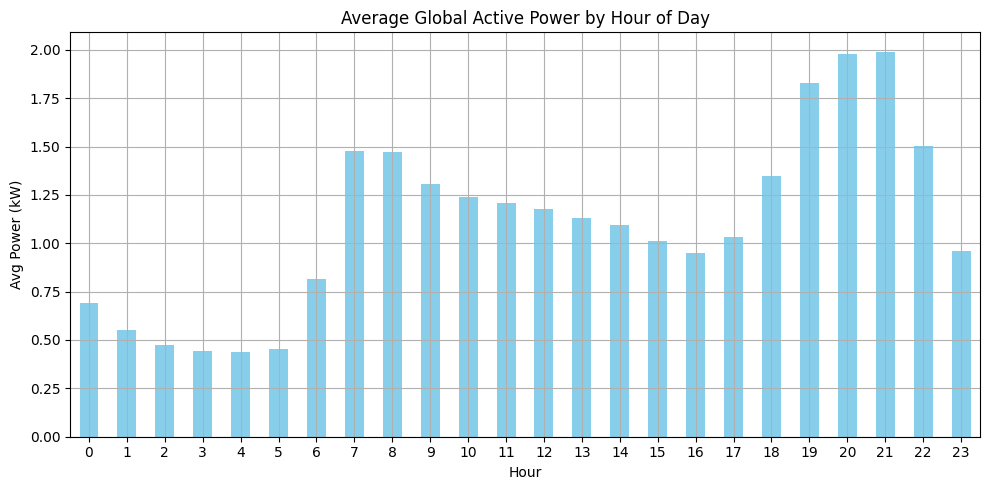

In [27]:
hourly_avg = df_hourly.groupby('hour')['Global_active_power'].mean()
plt.figure(figsize=(10, 5))
hourly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Global Active Power by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Avg Power (kW)')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


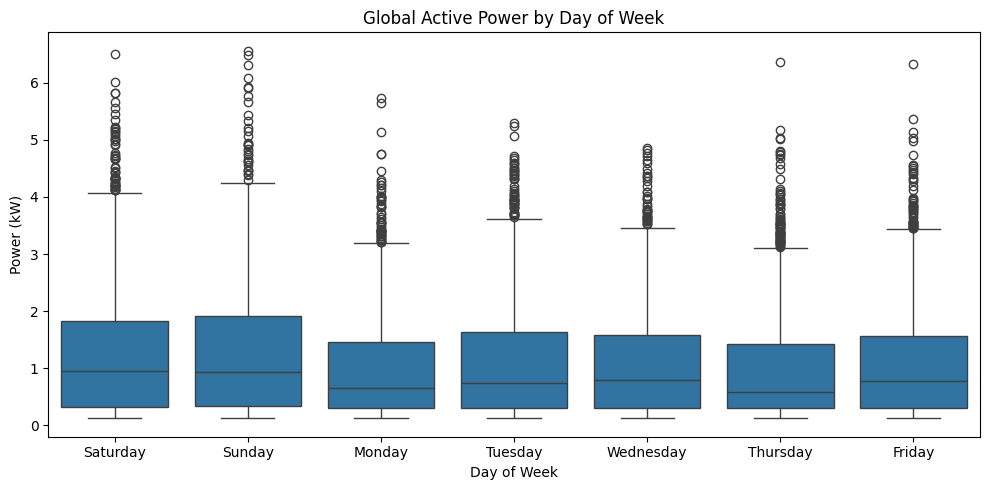

In [28]:
import seaborn as sns

df_hourly['day_name'] = df_hourly.index.day_name()
plt.figure(figsize=(10, 5))
sns.boxplot(x='day_name', y='Global_active_power', data=df_hourly)
plt.title('Global Active Power by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Power (kW)')
plt.tight_layout()
plt.show()


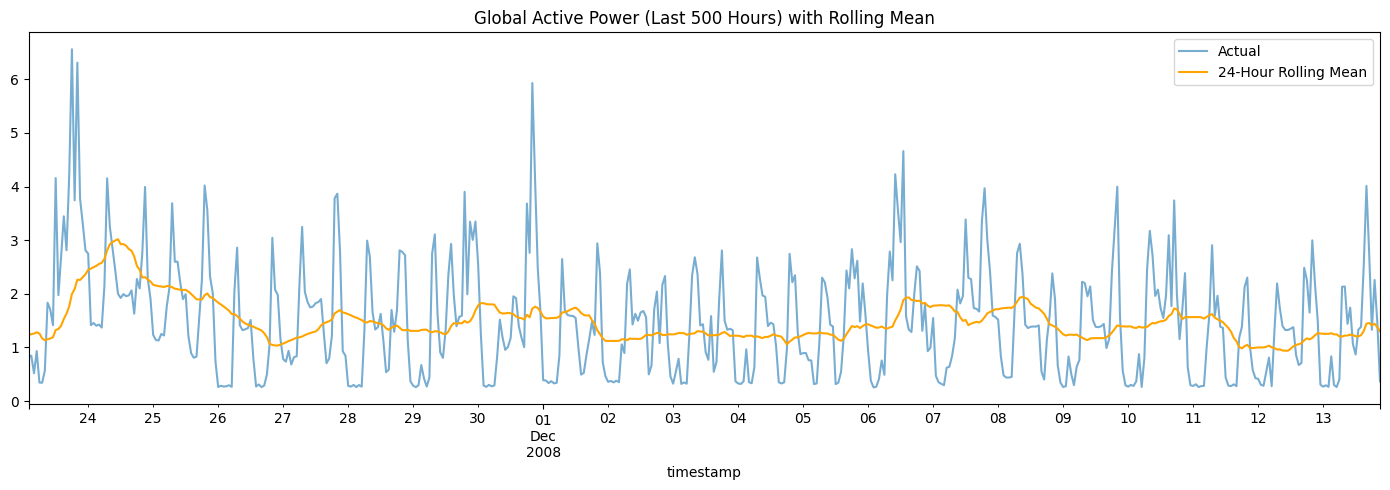

In [30]:
plt.figure(figsize=(14, 5))
df_hourly['Global_active_power'].tail(500).plot(label='Actual', alpha=0.6)
df_hourly['Global_active_power'].rolling(24).mean().tail(500).plot(label='24-Hour Rolling Mean', color='orange')
plt.title('Global Active Power (Last 500 Hours) with Rolling Mean')
plt.legend()
plt.tight_layout()
plt.show()


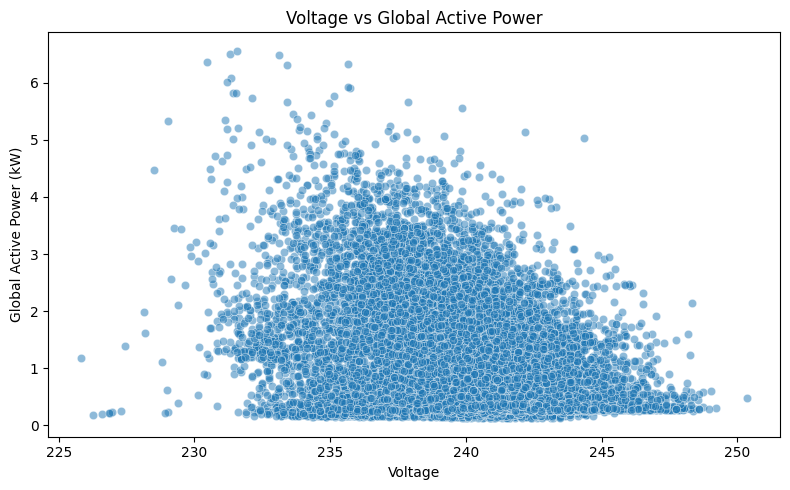

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Voltage', y='Global_active_power', data=df_hourly, alpha=0.5)
plt.title('Voltage vs Global Active Power')
plt.xlabel('Voltage')
plt.ylabel('Global Active Power (kW)')
plt.tight_layout()
plt.show()


<Figure size 1200x500 with 0 Axes>

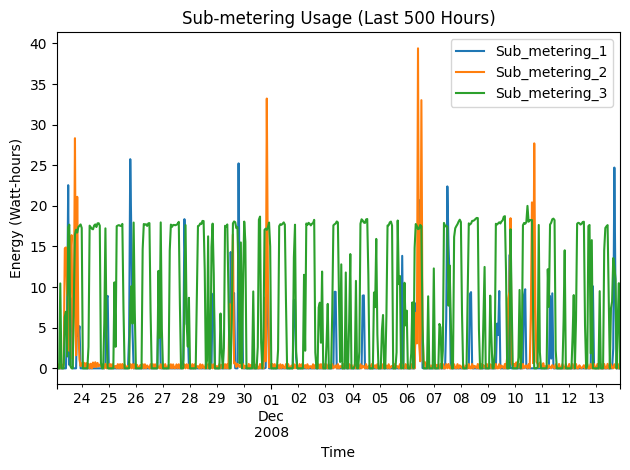

In [32]:
plt.figure(figsize=(12, 5))
df_hourly[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].tail(500).plot()
plt.title('Sub-metering Usage (Last 500 Hours)')
plt.ylabel('Energy (Watt-hours)')
plt.xlabel('Time')
plt.tight_layout()
plt.show()
